# Neural Networks

---

_Author: Dhavide Aruliah_

### Assignment Contents

- [Question 1: Implementing a Hard Threshold Activation Function](#q-threshold)
- [Question 2: Implementing the Perceptron Classifier](#q-classifier)
- [Question 3: Identifying Misclassified Points](#q-misclassified)
- [Question 4: Building the actual Perceptron Iteration](#q-iteration)
- [Question 5: Implementing `softmax`](#q-softmax)
- [Question 6: Implementing `relu`](#q-relu)
- [Question 7: Preprocessing the Digit Features](#q-features)
- [Question 8: Preprocessing the Targets](#q-targets)
- [Question 9: Setting up the Keras Architecture](#q-architecture)
- [Question 10: Fitting the Neural Network to Training Data](#q-fitting)
- [Question 11: Assessing Neural Network Model Accuracy](#q-assessing)

This assignment provides an opportunity to get used to *artificial neural networks* for supervised machine learning. We'll do this first by looking at the *perceptron* algorithm as an early example of a neural network. By building a simple program implementing the perceptron, you'll get a sense of the mathematical ideas underlying the training if neural networks. From there, you'll experiment with [Keras](https://keras.io/) as an example of a framework for building neural networks and solve a simple classification problem.

The goals of the present assignment are:
+ to get used to the core terminology used with neural networks: layers, units, activation functions, etc.
+ to implement the simplest neural network algorithm (the perceptron) to build a conceptual foundation on which neural networks are built.
+ to solve a simple problem (digit classification) using a neural networks framework.

In [1]:
# Standard boilerplate for Python for data science
%matplotlib inline
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

## The Perceptron

To begin, you will replicate one of the first models of an artificial Neural Network that came from [Frank Rosenblatt](https://en.wikipedia.org/wiki/Frank_Rosenblatt) in 1957. While working on research funded by the US Defense Department, Rosenblatt investigated a straightforward approach to developing a classification model. You will construct a basic implementation of the Perceptron from scratch before moving to the Keras library.

[Back to top](#Assignment-Contents)

---
<a id="q-threshold"></a>
## Question 1: Implementing a Hard Threshold Activation Function

Implement the hard threshold activation function `sign` with function signature `sign(t)` as given below.
+ Your function should follow the convention
  $$\mathrm{sign}(t) = \begin{cases} +1, & t\ge0 \\ -1, &t<0 \end{cases}$$
  for any real value $t\in\mathbb{R}$.
+ Make sure your function `sign` is [*vectorized*](https://docs.scipy.org/doc/numpy/glossary.html#term-vectorization) (i.e., is a [*universal function*](https://docs.scipy.org/doc/numpy/reference/ufuncs.html) in the parlance of Numpy). That is, it should accept a Numpy array as input and return a Numpy array of identical dimensions with entries $+1$ or $-1$ as required (i.e., the $\text{sign}$ function should be applied elementwise to the array).
+ Notice that `np.sign` won't work here (because `np.sign(0)==0` and you want `sign(0)==+1` instead).
+ The function `np.where` is likely useful here.

In [2]:
### GRADED
### QUESTION 1
### Complete the body of the function sign (with signature below) in agreement with
###   the details specified above.

def sign(t):
    return np.where(t>=0, 1, -1) # syntax: np.where(x,y,z)
                                 # where t>=0 then 1, else -1
###
### YOUR CODE HERE
###


In [3]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Assignment-Contents)

---
<a id="q-classifier"></a>

## Question 2: Implementing the Perceptron Classifier

Implement the function $f_{\mathrm{perceptron}}$ as defined in the video 20-01 with the signature `f_perceptrion(X, w, b)`. Mathematically, it could be written as $f_{\mathrm{perceptron}}(x) = \mathrm{sign}(W x^T +b)$ where $x$ is a row vector (i.e., one-dimensional array) of length $d$, $W$ is a row vector of length $d$, and $b$ is a scalar. The preceding equation differs slightly from the videos in assuming that $x$ is a row vector.
+ You will make the function more flexible by allowing for $N\times d$ *feature matrices* $X$ as input. In that case, the function can be computed as $f_{\mathrm{perceptron}}(x) = \mathrm{sign}(W X^T + b)$ (in which case the output is a $1\times N$ vector rather than a $1\times 1$ scalar).
+ Tip: If the conventions around row & column vectors are messy, consider using `np.squeeze` to reduce two-dimensional row or column vectors to one-dimensional vectors. Numpy is very permissive about computing matrix-vector products using one-dimensional arrays.

this function is used when taking two seperate groups of data points classified by -1 and +1, then using linear regression to draw a line between the two groups after being plotted on a graph'

    'Returns sign(W X^T + b) or the "activation function"'
    'd = length'
    'x is the row vector of length d(1 x d, or 1d or one dimensional)'
    'X is the matrix(N x d, or Nd, or N dimensional)
    'W is the row vector of length d'
    'b or "Bias Term" is the scalar/type of 1 x 1 matrix'
    'In the video x is not a single row vector but it is in this example'

In [4]:
### GRADED
### QUESTION 2
### Complete the function f_perceptron as specified above.
###

def f_perceptron(X, W, b):
    'Returns sign(W X^T + b) or the "activation function"' 
    no_bias = np.dot(W,(np.transpose(X)))
    return np.sign(no_bias + b)

    
###
### YOUR CODE HERE
###


In [5]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Assignment-Contents)

---
<a id="q-misclassified"></a>

## Question 3: Identifying Misclassified Points

Your task now is to write a function `find_misclassified` that identifies points that are misclassified by `f_perceptron` from above.
+ The function signature is `find_misclassified(X, y, W, b)` with:
  + $N\times d$ *feature matrix* `X`;
  + *weight vector* `W` of length $d$;
  + (scalar) *bias* `b`; and
  + target vector `y` of length $N$ with entries $+1$ or $-1$.
  The inputs `X`, `W`, and `b` are exactly as required for evaluating `f_perceptron`.
+ The output computed by the function `find_misclassified` is a one-dimensional Numpy array or a list of integers corresponding to rows of the input `X` that are misclassified by $f_{\mathrm{perceptron}}$. That is, `find_misclassified` returns the rows $k$ between $0$ and $N-1$ for which
  $$f_{\mathrm{perceptron}}(X_{k,:}, W, b) \neq y_{k},$$
  where $X_{k,:}$ refers to the $k$th row of the $N\times d$ matrix $X$.
+ The row indices output by `find_misclassified` should be sorted in increasing order.

In [6]:
### GRADED
### QUESTION 3
### Complete the function find_misclassified as specified above.
###
def find_misclassified(X, y, W, b):
    ###'Returns 1D array of index values for which f_perceptron misclassifies rows of X'
    
    N, d = X.shape
    rows = np.arange(N)
    y_hat = np.squeeze(f_perceptron(X, W, b))
    M = rows[y_hat != np.squeeze(y)]
    N = np.sort(M)
    return np.where(M != N, N, M)
    

###
### YOUR CODE HERE
###


In [7]:
testX = np.array([[  4.20811019,  -0.09798517,   4.75826135,  -6.23588559], [  3.14467235,  -8.0575068 ,   0.24582028,   1.05472419],
       [ -2.95200329,  -0.47806581,   0.43846259,   0.46692371], [  4.12273971,  -5.46557231,  -2.40378627,  -8.86015579]])
testy = np.array([ 1., 1., 1., -1.])
Wtest, btest = np.random.randn(testX.shape[1]), np.random.randint(low=-5, high=+5, size=(1,))

find_misclassified(testX, testy, Wtest, btest)

array([1, 3])

In [8]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


Given training data $X$ & $y$ for a binary classification problem, you are now ready to implement the perceptron algorithm to determine a classifier with parameters $W$ and $b$. The basic steps are:

+ Fix a random seed for the iteration (optional, but useful for reproducibility)
+ Initialize $W$ and $b$ with some random values;
+ REPEAT:
  + Compute the set $\mathcal{M}$ of rows of $X$ misclassified by $f_{\mathrm{perceptron}}(\cdot , W, b)$
  + Draw a row index $k$ from $\mathcal{M}$ at random
  + Use the $k$th row of $X$ and the $k$th entry of the label vector $y$ to update $W$ and $b$:
    $$\begin{aligned} W &\leftarrow W + \eta y_{k} X_{k,:} \\ b &\leftarrow b + \eta y_{k} \end{aligned}$$
    (above $\eta$ is a user-specified *learning rate*).
+ UNTIL convergence (i.e., until $\mathcal{M}$ is empty or, optionally, if the number of iterations is too large).

Your next task is to write a function that carries out this iteration.

[Back to top](#Assignment-Contents)

---
<a id="q-iteration"></a>
## Question 4: Building the actual Perceptron Iteration

+ The function `perceptron_iteration` with the signature `perceptron_iteration(X, y, eta=1.0, ITMAX=1000, random_state=None)`.
  + the positional inputs `X` and `y` are exactly as before from `find_misclassified`.
  + the optional keyword argument `eta` is the *learning rate* (default value `1.0`).
  + the optional keyword argument `ITMAX` is the maximum number of iterations (default value `1000`).
  + the optional keyword argument `random_state` is for seeding random number generation (default value `None`).
+ Convergence is achieved when the set $\mathcal{M}$ of row indices of misclassified points is *empty*.
+ The function should return the weights $W$ and the bias term $b$ as a 2-tuple on convergence.
+ If the iteration fails to converge within `ITMAX` iterations (i.e., if there are still points being misclassified), the function should return `None`.

In [11]:
### GRADED
### QUESTION 4
### Complete the function perceptron_iteration as laid out below.
###
def perceptron_iteration(X, y, eta=1.0, ITMAX=1000, random_state=None):
    '''Applies the perceptron algorithm to compute weights W and bias b associated with a binary
    classification problem defined by N by d feature matrix X and N-vector y of labels.
    '''
    
    np.random.seed(seed=random_state) # DO NOT CHANGE THIS LINE
    N, d = X.shape
    W, b = np.random.randn(d), np.random.randn(1)
    
   # Determine misclassified rows of X
    M = find_misclassified(X, y, W, b)
    
    # ITERATE:
    # Choose an index k from misclassified rows
    for iteration in range(ITMAX):
        
        # Compute updates to W and b
        if len(M):
            k = np.random.choice(M)
            W, b = W + eta * y[k] * X[k,:], b + eta*y[k]
            M = find_misclassified(X, y, W, b)
        else:
            break
        # Determine misclassified rows of X with new W and b
        # new_misclassified = find_misclassified(X, y, updates_W, updates_b)
        # Return W & b (unless convergence failed, so return (None, None))
    if iteration < (ITMAX-1):
        return W, b
    else:
        return (None, None)

In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


## Neural networks

Recognizing that the perceptron has two conceptual layers (an *input* layer and an *output* layer) that connects spaces of disparate dimensions, we can extend this model to more general functions. That is, we can build a *multi-layer perceptron* with multiple input layers, each associated with their own weight matrix, bias vector, and activation function. It is possible to use more general *network architectures* with these components to represent more sophisticated functions.

A key component of this is the choice of *activation function*.

+ For binary classification problems, the logistic activation function
  $$ \sigma(t) = \frac{e^{t}}{1+e^t} $$
  (as seen from logisitc regression) is useful for probabilities of belonging to one of the two classes.
+ For multiclass classification problems, the $\text{softmax}$ function is often used to provide probabilities of belonging to any of a number of classes. It is a mapping $x \mapsto \mathrm{softmax}(x)$ of a vector of length $d$ to another vector of length $d$ defined by
  $$[\mathrm{softmax}(x)]_{k} := \frac{e^{x_k}}{\sum_{i=1}^{d}e^{x_{i}}} = \frac{\exp(x_k)}{\sum_{i=1}^{d} \exp(x_i)} \qquad(k=1,2,\dotsc,d).$$
  Notice that the nonnegative entries of $\mathrm{softmax}(x)$ add up to $1$ so it is, in effect, a discrete probability mass function.
+ The *ReLU* ("rectified linear unit") function is a piecewise linear function defined by
  $$\mathrm{relu}(t) = \begin{cases} t, & t\ge0 \\ 0, &t<0 \end{cases}.$$
  The ReLU function is often used in between internal layers of a regression models.

[Back to top](#Assignment-Contents)

---
<a id="q-softmax"></a>
## Question 5: Implementing `softmax`

For this task, you will complete the Python function `softmax` function defined by
$$[\mathrm{softmax}(x)]_{k} := \frac{e^{x_k}}{\sum_{i=1}^{d}e^{x_{i}}} = \frac{\exp(x_k)}{\sum_{i=1}^{d} \exp(x_i)}.$$
+ To obtain a more numerically robust implementation, do the following: if $M=\max_{i}(x_{i})$, then
  $$[\mathrm{softmax}(x)]_{k} = \frac{\exp(x_k - M)}{\sum_{i=1}^{d} \exp(x_i-M)}.$$
  You will complete the function `softmax` using this version (which does not overflow for large values of $x_k$).
+ Make sure your function is *vectorized* (i.e., is a *universal function* in the parlance of Numpy). That is, it should accept a Numpy array as input and return a Numpy array of identical dimensions with appropriate real-valued entries required (i.e., the $\mathrm{softmax}$ function should be applied elementwise to the array).

In [18]:
### GRADED
### QUESTION 5
### Complete the function softmax as defined above.
###
def softmax(x):
    'Returns smoothed version of max. function'
    e_x = np.exp(x - np.max(x)) # np.exp calcs exponential of all array values
                                # np.max returns the max value along a given axis of an arrary
    print("e_x: ",e_x,"|","x: ",x,"|","max(x): ",np.max(x)) 
                                # So, the equation takes an array 'x' and subtracts the max value of that array then calcs expo 
    return e_x / e_x.sum()      # then divides those exponential values by their sum (i.e. - Softmax)

scores = [3.0, 1.0, 0.2]
print(softmax(scores))
###
### YOUR CODE HERE
###


e_x:  [1.         0.13533528 0.06081006] | x:  [3.0, 1.0, 0.2] | max(x):  3.0
[0.8360188  0.11314284 0.05083836]


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Assignment-Contents)

---
<a id="q-relu"></a>
## Question 6: Implementing `relu`

You task here is to complete the function `relu` (the *rectified linear unit* or "ReLU" function) with signature given below.
+ Your function `relu` should follow the convention
  $$\mathtt{relu}(t) = \begin{cases} t, & t\ge0 \\ 0, &t<0 \end{cases}$$
  for any real value $t\in\mathbb{R}$.
+ Make sure your function is *vectorized* (i.e., is a *universal function* in the parlance of Numpy). That is, it should accept a Numpy array as input and return a Numpy array of identical dimensions with appropriate real-valued entries required (i.e., the $\mathrm{relu}$ function should be applied elementwise to the array).
+ The function `np.where` is likely useful here.

In [19]:
### GRADED
### QUESTION 6
### Complete the function relu as specified above.
###
def relu(t):
    "Returns t for t>=0, zero otherwise"
    return np.where(t>=0, t, 0)
###
### YOUR CODE HERE
###


In [20]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


## Introduction to Keras

<center>
    <a href="http://keras.io"><img src = "assets/keras.png" width = "50%" height = "50%" /></a>
</center>

Now that you have some familiarity with activation functions and with the perceptron as a simple neural network, you can use [Keras](http://keras.io) as a framework to solve problems using neural networks. Keras is a library that provides a simple API for neural network algorithms on top of lower-level libraries like [Tensorflow](https://www.tensorflow.org/) or [Theano](https://github.com/Theano/Theano). Other high-level frameworks for neural networks ("deep learning") include [Chainer](https://chainer.org/) and [PyTorch](https://pytorch.org/).

In the next few exercises, you'll get a chance to solve the [MNIST handwritten digits classification problem](http://yann.lecun.com/exdb/mnist/) using Keras. The package provides [utilities to work with numerous datasets](https://keras.io/datasets/), but we'll avoid those here (to limit needless network traffic). Instead, we've created a compressed Numpy file in the local `assets` folder that contains the relevant data. The next few lines extract the arrays `X_train`, `y_train`, `X_test`, and `y_test` from that file.

In [12]:
d_file = np.load('assets/mnist.npz')
X_train_orig = d_file['X_train']
X_test_orig = d_file['X_test']
y_train_orig = d_file['y_train']
y_test_orig = d_file['y_test']

In [13]:
for arr in [X_train_orig, X_test_orig, y_train_orig, y_test_orig]:
    print(arr.shape, arr.nbytes)

(60000, 28, 28) 47040000
(10000, 28, 28) 7840000
(60000,) 60000
(10000,) 10000


In [14]:
print(X_train_orig[5:])

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


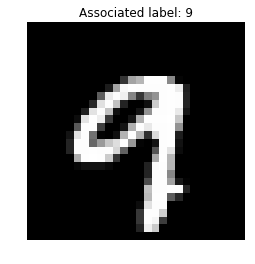

In [15]:
# Extract a single image
idx = 45621
digit_image = X_train_orig[idx]
plt.imshow(digit_image, cmap='gray')
plt.axis('off')
plt.title('Associated label: {}'.format(y_train_orig[idx]));

[Back to top](#Assignment-Contents)

---
<a id="q-features"></a>
## Question 7: Preprocessing the Digit Features

As a first step, preprocess the features in the arrays `X_train_orig` & `X_test_orig`.

+ Reshape the three-dimensional arrays into two-dimensional arrays.
 + Numpy arrays have a method for reshaping (or use the function `np.reshape`).
+ Rescale the integer values to be real values between 0 and 1.
 + Divide the arrays by 255.0 (the grayscale images have integer values between 0 & 255 by default).
+ Bind the rescaled & reshaped training & testing arrays to `X_train` & `X_test` respectively.

In [16]:
### GRADED
### QUESTION 7
### Rescale & reshape the feature arrays X_train_orig & X_test_orig as described above.
### Assign the results to X_train & X_test respectively.
### YOUR SOLUTION HERE:

X_train = X_train_orig.reshape(X_train_orig.shape[0],-1) / 255.0
X_test  = X_test_orig.reshape(X_test_orig.shape[0],-1) / 255.0

# the shape[0], -1
# the -1 in the reshape tells numpy to figure out the dimensions
# the [0] in the reshape reduces the 3D array to a 2D array

### For verification:
print('X_train: {}'.format(X_train.shape))
print('X_test:  {}'.format(X_test.shape))

X_train: (60000, 784)
X_test:  (10000, 784)


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Assignment-Contents)

---
<a id="q-targets"></a>
## Question 8: Preprocessing the Targets

As a second step, preprocess the targets `y_train_orig` & `y_test_orig` by converting them to two-dimensional arrays with one-hot encoded rows (corresponding to each categorical label).
+ The function `to_categorical` from `keras.utils` will do this for you.
+ Bind the results to `y_train` and `y_test`.

In [17]:
### GRADED
### QUESTION 8
### Convert the target arrays y_train_orig & y_test_orig as described above.
### Assign the results to y_train & y_test respectively.
from keras.utils import to_categorical
### YOUR SOLUTION HERE:
y_train = to_categorical(y_train_orig)
y_test = to_categorical(y_test_orig)
### For verification:
print('y_train: {}'.format(y_train.shape))
print('y_test:  {}'.format(y_test.shape))
print(y_test[:3]) # First three rows

Using TensorFlow backend.


y_train: (60000, 10)
y_test:  (10000, 10)
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Assignment-Contents)

---
<a id="q-architecture"></a>
## Question 9: Setting up the Keras Architecture

You are now ready to instantiate a neural network model to solve the digits classification problem. This is referred to as specifying the *architecture* of the neural network.

+ To initialize the model, instantiate an object of the class `models.Sequential`. Use the default options.
+ Add a hidden layer using `network.add` with `layers.Dense`.
  + The first argument to `layers.Dense` is `512` (for 512 units).
  + Use the keyword argument `activation='relu'` to specify the ReLU activation function for this layer.
  + As this is the first layer instantiated, it is necessary to specify `input_shape` as a *tuple*.
+ Add a final output layer using `network.add` & `layers.Dense`.
  + This layer will have 10 units and `activation='softmax'` to specify the final output of the setup.

In [26]:
### GRADED
### QUESTION 9
### Create the neural network architecture using models.Sequential.
###   Bind the object to the identifier "network" and add two layers: a dense layer with
###   512 units with an activation function 'relu' and another dense layer, this time with
###  10 units and an activation function 'softmax'. Remember that the first layer requires
###  specification of the input dimensions. 
from keras import models
from keras import layers

# Instantiate the model
network = models.Sequential()

# hidden layer
network.add(layers.Dense(512, activation='relu', input_shape = X_train.shape[1:]))

# output layer
network.add(layers.Dense(10, activation='softmax'))



In [19]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


To get `network` ready to fit to the training data, you have to first *compile* it. This involves specifying the optimizer (a choice of strategies to apply to solve for the network parameters), the loss function to minimize (categorical cross-entropy in this case as is common for multi-class classification problems), and a choice of metrics to track in the iterative process.

In [29]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

[Back to top](#Assignment-Contents)

---
<a id="q-fitting"></a>
## Question 10: Fitting the Neural Network to Training Data

You can fit the training data and evaluating prediction using the `fit` method.
+ The `fit` method requires the feature array `X_train` and the target array `y_train` as inputs.
+ As optional keyword arguments, specify `epochs=5` (the number of sweeps through the data to make) and `batch_size=128` (the number of data points to use in each sweep through the data). This is in principle the same as the iterations of stochastic gradient descent (with a batch size of 1) made in the perceptron algorithm.
+ Bind the output of `network.fit` to the identifier `history`.

In [30]:
### GRADED
### QUESTION 10
### Apply the fit method to the object network to using the training data and the options
###   specified above. Assign the result to the identifier history.
### YOUR SOLUTION HERE:

history = network.fit(X_train, y_train, epochs = 5, batch_size = 128) # fit the model similar to scikit learn


Epoch 1/5
60000/60000 [==============================] - 6s 93us/step - loss: 0.2576 - acc: 0.9249
Epoch 2/5
60000/60000 [==============================] - 2s 37us/step - loss: 0.1020 - acc: 0.9697
Epoch 3/5
60000/60000 [==============================] - 2s 37us/step - loss: 0.0681 - acc: 0.9797
Epoch 4/5
60000/60000 [==============================] - 2s 37us/step - loss: 0.0494 - acc: 0.9849
Epoch 5/5
60000/60000 [==============================] - 2s 37us/step - loss: 0.0374 - acc: 0.9887


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Assignment-Contents)

---
<a id="q-assessing"></a>
## Question 11: Assessing Neural Network Model Accuracy

Finally, you can assess the accuracy of the .model using the testing data.
+ Apply the `evaluate` method to the object `network` with the testing data `X_test` & `y_test` as input.
+ The output will be a sequence of two values: the loss and the accuracy. Assign these values to `test_loss` and `test_acc` respectively.

In [32]:
### GRADED
### QUESTION 11
### Use the testing arrays X_test & y_test to compute the loss function & accuracy on the test data.
###   Assign the results to test_loss & test_acc respectively.
### YOUR SOLUTION HERE:
test_loss, test_acc = network.evaluate(X_test, y_test)
print('test_loss: {:9.4g}'.format(test_loss))
print('test_acc:  {:9.4g}'.format(test_acc))

10000/10000 [==============================] - 1s 54us/step
test_loss:   0.07164
test_acc:     0.9789


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


Now you've worked through this, you've built your first neural network model from end-to-end!

[Back to top](#Assignment-Contents)

## References

+ [*Artificial Neural Network* ](https://en.wikipedia.org/wiki/Artificial_neural_network) (Wikipedia)
+ [Neural Networks & Deep Learning](http://neuralnetworksanddeeplearning.com/) by Michael Nielsen
+ [Keras documentation](https://keras.io)